<a href="https://colab.research.google.com/github/selimunal/Pytorch/blob/main/ANN_For_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
#make the dataset
N=1000
X=np.random.random((N,2)) * 6-3 #uniformly distributed between (-3,+3)
Y=np.cos(2*X[:,0])+np.cos(3*X[:,1])

In [ ]:
X.shape

(1000, 2)

In [ ]:
X.max()

2.9969536125476566

In [ ]:
Y.shape

(1000,)

In [ ]:
Y.max()

1.988302181870052

In [ ]:
X[0].shape

(2,)

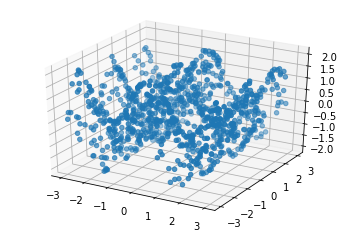

In [ ]:
#plot it
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],Y)
#plt.show()

In [ ]:
#build the model
model=nn.Sequential(
    nn.Linear(2,128),
    nn.ReLU(),
    nn.Linear(128,1)
)

In [ ]:
#Loss and Optimizer
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
#Train the model
def full_gd(model,criterion, optimizer,X_train,y_train,epochs=1000):
  #stuff to store
  train_losses=np.zeros(epochs)

  for it in range(epochs):
    #zero the parameter gradients
    optimizer.zero_grad()

    #forward pass
    outputs=model(X_train)
    loss=criterion(outputs,y_train)

    #backward and optimize
    loss.backward()
    optimizer.step()

    #save losses
    train_losses[it]=loss.item()

    if (it+1)%50==0:
      print(f"Epochs {it+1}/{epochs}, Train Loss: {loss.item():.4f}")

  return train_losses

X_train=torch.from_numpy(X.astype(np.float32))
y_train=torch.from_numpy(Y.astype(np.float32))

train_losses=full_gd(model,criterion,optimizer,X_train,y_train)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([1000])) that is different to the input size (torch.Size([1000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epochs 50/1000, Train Loss: 0.9144
Epochs 100/1000, Train Loss: 0.9144
Epochs 150/1000, Train Loss: 0.9144
Epochs 200/1000, Train Loss: 0.9144
Epochs 250/1000, Train Loss: 0.9143
Epochs 300/1000, Train Loss: 0.9143
Epochs 350/1000, Train Loss: 0.9143
Epochs 400/1000, Train Loss: 0.9143
Epochs 450/1000, Train Loss: 0.9143
Epochs 500/1000, Train Loss: 0.9143
Epochs 550/1000, Train Loss: 0.9143
Epochs 600/1000, Train Loss: 0.9143
Epochs 650/1000, Train Loss: 0.9143
Epochs 700/1000, Train Loss: 0.9143
Epochs 750/1000, Train Loss: 0.9143
Epochs 800/1000, Train Loss: 0.9143
Epochs 850/1000, Train Loss: 0.9143
Epochs 900/1000, Train Loss: 0.9143
Epochs 950/1000, Train Loss: 0.9143
Epochs 1000/1000, Train Loss: 0.9143


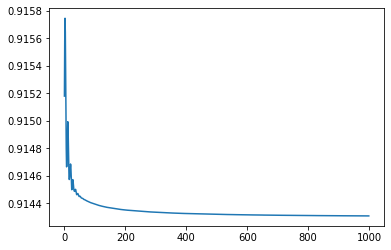

In [ ]:
plt.plot(train_losses)

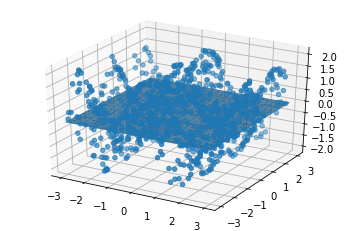

In [ ]:
#plot prediction surface
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],Y)

#surface plot
with torch.no_grad():
  line=np.linspace(-3,3,50)
  xx,yy=np.meshgrid(line,line)
  Xgrid=np.vstack((xx.flatten(),yy.flatten())).T
  Xgrid_torch=torch.from_numpy(Xgrid.astype(np.float32))
  Yhat=model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
  plt.show()

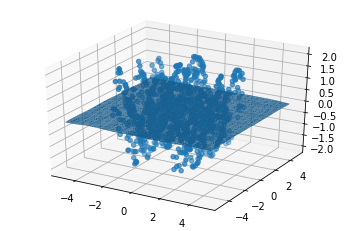

In [ ]:
#plot prediction surface
fig=plt.figure()
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X[:,0],X[:,1],Y)

#surface plot
with torch.no_grad():
  line=np.linspace(-5,5,50)
  xx,yy=np.meshgrid(line,line)
  Xgrid=np.vstack((xx.flatten(),yy.flatten())).T
  Xgrid_torch=torch.from_numpy(Xgrid.astype(np.float32))
  Yhat=model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat,linewidth=0.2,antialiased=True)
  plt.show()

In [ ]:
def pseuoo(input_image,kernel):
  in_height=input_image.shape[0]
  in_width=input_image.shape[1]
  ker_height=kernel.shape[0]
  ker_width=kernel.shape[1]
  out_height=in_height-ker_height+1
  out_width=in_width-ker_width+1
  out_image=np.zeros((out_height,out_width))
  for i in range(0,out_height):
    for j in range(0,out_width):
      for ii in range(0, ker_height):
        for jj in range(0, ker_width):
          out_image[i,j] +=input_image[i+ii,j+jj]*kernel[ii,jj]
  print(out_image.shape)

In [ ]:
import numpy as np

In [ ]:
input_image=np.random.rand(10,10)

In [ ]:
kernel=np.random.rand(2,2)

In [ ]:
pseuoo(input_image,kernel)

(9, 9)
